# Analysis of Basic RAG Pipeline with GPT-3.5-Turbo

**Database**: Max Tokens 120, Sentence Chunking, Overlap 20

**Instructions**: "You are a glycobiology assistant for GlyGen that helps scientists navigate and utilize a bioinformatics knowledgebase."

**Prompt Template**: 

"Context information from 'Essentials of Glycobiology' (4th edition) is below.\n" \
"---------------------\n" \
"{context_str}\n" \
"---------------------\n" \
"Given the information from the selected text and not prior knowledge, " \
"answer the query.\n" \
"Query: {query_str}\n" \
"Answer: "

**Retrieval**: Top-K = 5, Response Mode = "tree-summarize"

**LLM, Embedding Model**: GPT-3.5-Turbo for both

**Dummy Comparison Constraints**: RAG with GPT-4o Glycobiology Definition

In [20]:
import pandas as pd

### Initial Descriptive Stats with RAGAS Scores

In [21]:
baseline_df = pd.read_csv('ragas_curated_baseline.csv', encoding='utf-8')
textbook_df = pd.read_csv('ragas_curated.csv', encoding='utf-8')
textbook_df.head()

,Unnamed: 0,question,contexts,answer,ground_truth,faithfulness,answer_relevancy,answer_similarity,context_relevancy,context_precision,context_recall
0,0,"Complete the following paragraph: A more complete paradigm of molecular biology must therefore include glycans, often in covalent combination with other macromolecules (i.e., glycoconjugates, such as glycoproteins and glycolipids). In analogy to the current situation in Cosmology, glycans can be considered as the “dark matter” of the biological universe: a major and critical component that has yet to be fully incorporated into the “standard model” of biology.","['In analogy to the current situation in Cosmology, glycans can be considered as the “dark matter” of the biological universe: a major and critical component that has yet to be fully incorporated into the “standard model” of biology. However, unlike the situation with dark matter in the Universe, there is already a lot known about glycans. The chemistry and metabolism of carbohydrates were prominent matters of interest in the first part of the 20th century.'\n 'In addition, simple, rapidly turning over, protein-bound glycans are abundant within the nucleus and cytoplasm, in which they can serve as regulatory switches. A more complete paradigm of molecular biology must therefore include glycans, often in covalent combination with other macromolecules (i.e., glycoconjugates, such as glycoproteins and glycolipids).'\n 'Given all these major advances in basic and applied research on glycans, there is no reason why this major class of biomolecules should continue to be the “dark matter ...","As our understanding of the functions of glycans increases, biochemists and biologists will come to recognize that glycan modifications are no less important than the amino acids that make up the polypeptide backbone or the nucleotides and nucleotide derivatives that make up DNA and RNA. In the long run, glycobiology will merge into a holistic approach to biological systems. When that intellectual singularity is eventually achieved, further editions of this book may no longer be necessary.","However, unlike the situation with dark matter in the Universe, there is already a lot known about glycans. The chemistry and metabolism of carbohydrates were prominent matters of interest in the first part of the 20th century. Although engendering much attention, they were primarily considered as a source of energy or as structural materials, apparently lacking other biological activities. Furthermore, during the molecular biology revolution of the 1970s, studies of glycans lagged far behind those of other major classes of molecules. This was in part because of their inherent structural complexity, the difficulty in determining their sequences, and the fact that their biosynthesis could not be directly predicted from a DNA template.",1.000000,0.449996,0.683882,0.076923,1.000000,0.400000
1,1,"Complete the following paragraph: Monosaccharide names are frequently abbreviated; most common are three-letter abbreviations for simple monosaccharides (e.g., Gal, Glc, Man, Xyl, Fuc). There are nine common monosaccharides found in vertebrate glycoconjugates (Figure 2.4). Once incorporated into a glycan, these nine monosaccharide building blocks can be further modified to generate additional sugar structures.","['There are nine common monosaccharides found in vertebrate glycoconjugates (Figure 2.4). Once incorporated into a glycan, these nine monosaccharide building blocks can be further modified to generate additional sugar structures. For example, glucuronic acid (GlcA) can be epimerized at C-5 to generate IdoA.'\n 'For example, D-mannose is the C-2 epimer of D-glucose, whereas D-galactose is the C-4 epimer of D-glucose (Figure 2.4). Monosaccharide names are frequently abbreviated; most common are three-letter abbreviations for simple monosaccharides (e.g., Gal, Glc, Man, Xyl, Fuc).'\n 'Thus, much of the possible diversity may yet exist in nature. Although s

In [22]:
# Drop the extra index column
baseline_df.drop(columns=['Unnamed: 0'], inplace=True)
textbook_df.drop(columns=['Unnamed: 0'], inplace=True)
baseline_df.head()

,question,contexts,answer,ground_truth,faithfulness,answer_relevancy,answer_similarity,context_relevancy,context_precision,context_recall
0,"Complete the following paragraph: A more complete paradigm of molecular biology must therefore include glycans, often in covalent combination with other macromolecules (i.e., glycoconjugates, such as glycoproteins and glycolipids). In analogy to the current situation in Cosmology, glycans can be considered as the “dark matter” of the biological universe: a major and critical component that has yet to be fully incorporated into the “standard model” of biology.","['Glycobiology is the study of the structure, function, and biology of carbohydrates (glycans) and their roles in biology. Glycans are complex carbohydrates that are found in all living organisms, often attached to proteins and lipids, and they play crucial roles in various biological processes, including cell signaling, immune response, and disease progression.'\n 'Key areas of focus in glycobiology include:\n\n Glycan Structure: Understanding the chemical structures of glycans, including monosaccharides (simple sugars) and their linkages to form oligosaccharides and polysaccharides.\n\n Glycosylation: The process by which glycans are covalently attached to proteins or lipids.']","A more complete paradigm of molecular biology must therefore include glycans, often in covalent combination with other macromolecules (i.e., glycoconjugates, such as glycoproteins and glycolipids). In analogy to the current situation in Cosmology, glycans can be considered as the “dark matter” of the biological universe: a major and critical component that has yet to be fully incorporated into the “standard model” of biology. Glycans play crucial roles in various biological processes, including cell signaling, immune response, and disease progression, highlighting their significance in the intricate web of biological systems.","However, unlike the situation with dark matter in the Universe, there is already a lot known about glycans. The chemistry and metabolism of carbohydrates were prominent matters of interest in the first part of the 20th century. Although engendering much attention, they were primarily considered as a source of energy or as structural materials, apparently lacking other biological activities. Furthermore, during the molecular biology revolution of the 1970s, studies of glycans lagged far behind those of other major classes of molecules. This was in part because of their inherent structural complexity, the difficulty in determining their sequences, and the fact that their biosynthesis could not be directly predicted from a DNA template.",0.714286,0.651387,0.751800,0.400000,1.0,0.0
1,"Complete the following paragraph: Monosaccharide names are frequently abbreviated; most common are three-letter abbreviations for simple monosaccharides (e.g., Gal, Glc, Man, Xyl, Fuc). There are nine common monosaccharides found in vertebrate glycoconjugates (Figure 2.4). Once incorporated into a glycan, these nine monosaccharide building blocks can be further modified to generate additional sugar structures.","['Key areas of focus in glycobiology include:\n\n Glycan Structure: Understanding the chemical structures of glycans, including monosaccharides (simple sugars) and their linkages to form oligosaccharides and polysaccharides.\n\n Glycosylation: The process by which glycans are covalently attached to proteins or lipids.'\n 'Glycobiology is the study of the structure, function, and biology of carbohydrates (glycans) and their roles in biology. Glycans are complex carbohydrates that are found in all living organisms, often attached to proteins and lipids, and they play crucial roles in various biological processes, including cell signaling, immune response, and disease progression.']","Once incorporated into a glycan, these nine monosaccharide building blocks can be further modified to generate additional sugar structures. These modifications can inc

In [23]:
baseline_df.describe()

,faithfulness,answer_relevancy,answer_similarity,context_relevancy,context_precision,context_recall
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,0.237643,0.732277,0.698868,0.210590,0.677083,0.106548
std,0.302810,0.155971,0.103141,0.088856,0.403792,0.255162
min,0.000000,0.341833,0.357878,0.166667,0.000000,0.000000
25%,0.000000,0.637920,0.643278,0.166667,0.500000,0.000000
50%,0.000000,0.729379,0.717596,0.200000,1.000000,0.000000
75%,0.500000,0.840723,0.769383,0.200000,1.000000,0.000000
max,1.000000,1.000000,0.908088,0.800000,1.000000,1.000000


In [24]:
textbook_df.describe()

,faithfulness,answer_relevancy,answer_similarity,context_relevancy,context_precision,context_recall
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,0.858709,0.687507,0.729780,0.159589,0.914222,0.356506
std,0.280003,0.176074,0.105185,0.071913,0.199744,0.361261
min,0.000000,0.000000,0.453344,0.066667,0.000000,0.000000
25%,0.809375,0.593168,0.663554,0.100000,0.916667,0.000000
50%,1.000000,0.691793,0.726107,0.153846,1.000000,0.250000
75%,1.000000,0.791735,0.791935,0.200000,1.000000,0.511364
max,1.000000,1.000000,0.940310,0.363636,1.000000,1.000000


In [25]:
# metric pairwise t-test
from scipy.stats import ttest_ind
metrics = ['faithfulness', 'answer_relevancy', 'answer_similarity', 'context_relevancy', 'context_precision', 'context_recall']
for metric in metrics:
    a = baseline_df[metric]
    b = textbook_df[metric]
    t, p = ttest_ind(a, b)
    print(f'{metric}: t={t}, p={p}')

faithfulness: t=-14.754591433714447, p=2.4872047167501737e-33
answer_relevancy: t=1.864883718674159, p=0.06373971009040152
answer_similarity: t=-2.0560043360969824, p=0.041149463121062095
context_relevancy: t=4.371491786989001, p=2.0295282729665585e-05
context_precision: t=-5.157596642186878, p=6.257117474649967e-07
context_recall: t=-5.537323976928819, p=1.0115694628382098e-07


**Faithfulness** -> measures the factual consistency of the generated answer against the given context. It is calculated from answer and retrieved context. The answer is scaled to (0,1) range. Higher the better.

**Answer Relevance** -> focuses on assessing how pertinent the generated answer is to the given prompt. A lower score is assigned to answers that are incomplete or contain redundant information and higher scores indicate better relevancy. This metric is computed using the question, the context and the answer.

**Answer Semantic Similarity** -> semantic resemblance between the generated answer and the ground truth. This evaluation is based on the ground truth and the answer, with values falling within the range of 0 to 1. A higher score signifies a better alignment between the generated answer and the ground truth.

**Context Relevance** *RECENTLY DEPRECATED* -> gauges the ratio of question-relevant sentences in the contexts to estimate the amount of essential information in the retrieved contexts. To compute this, we initially estimate the value of |*S*| by identifying sentences within the retrieved context that are relevant for answering the given question. The values fall within the range of (0, 1), with higher values indicating better relevancy.

**Context Precision** -> evaluates whether all of the ground-truth relevant items present in the contexts are ranked higher or not. Ideally all the relevant chunks must appear at the top ranks. This metric is computed using the question, ground_truth and the contexts, with values ranging between 0 and 1, where higher scores indicate better precision.

**Context Recall** -> extent to which the retrieved context aligns with the annotated answer, treated as the ground truth. It is computed based on the ground truth and the retrieved context, and the values range between 0 and 1, with higher values indicating better performance.

### TF-IDF, Sentence Overlap, N-Gram Overlap

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize, PunktSentenceTokenizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from scipy.stats import pearsonr, spearmanr

In [27]:
type(textbook_df['contexts'][0])

str

In [28]:
def extract_context_list(sample):
    """converts the contexts column into a list of strings"""
    sample = sample.replace('[', '')
    sample = sample.replace(']', '')
    sample = sample.split('\n')
    for i, t in enumerate(sample):
        sample[i] = t[1:-1]
        if sample[i][0] == "'":
            sample[i] = sample[i][1:]

    return sample

In [29]:
extract_context_list(textbook_df['contexts'][0])

['In analogy to the current situation in Cosmology, glycans can be considered as the “dark matter” of the biological universe: a major and critical component that has yet to be fully incorporated into the “standard model” of biology. However, unlike the situation with dark matter in the Universe, there is already a lot known about glycans. The chemistry and metabolism of carbohydrates were prominent matters of interest in the first part of the 20th century.',
 'In addition, simple, rapidly turning over, protein-bound glycans are abundant within the nucleus and cytoplasm, in which they can serve as regulatory switches. A more complete paradigm of molecular biology must therefore include glycans, often in covalent combination with other macromolecules (i.e., glycoconjugates, such as glycoproteins and glycolipids).',
 'Given all these major advances in basic and applied research on glycans, there is no reason why this major class of biomolecules should continue to be the “dark matter of t

In [30]:
textbook_df['contexts'] = textbook_df['contexts'].apply(extract_context_list)
baseline_df['contexts'] = baseline_df['contexts'].apply(extract_context_list)
type(textbook_df['contexts'][0])

list

**Helper Functions**

In [31]:
# helper function to sentence tokenize contexts and target
def sent_overlap(target: str, contexts: list):
    """Computes sentence overlap between target and contexts"""
    sentence_tokenizer = PunktSentenceTokenizer()
    target_sentences = sentence_tokenizer.tokenize(target)
    context_sentences = []
    for context in contexts:
        context_sentences.extend(sentence_tokenizer.tokenize(context))
    hits = [True for sentence in target_sentences if sentence in context_sentences]
    return len(hits) / len(target_sentences)

# helper function to compute n-gram overlap
def ngram_overlap(target: str, contexts: list, n: int):
    """Computes n-gram overlap between target and contexts"""
    target_ngrams = set([target[i:i+n] for i in range(len(target)-n+1)])
    context_ngrams = []
    for context in contexts:
        context_ngrams.extend(set([context[i:i+n] for i in range(len(context)-n+1)]))
    hits = [True for ngram in target_ngrams if ngram in context_ngrams]
    return len(hits) / len(target_ngrams)

# TF-IDF helper fxs
# Create the vectorizer
vectorizer = TfidfVectorizer(analyzer='word', max_df=0.5, stop_words='english')

# helper fx
def vectorize_answers(answers, target, vectorizer):
    """vectorizes the answers against given target"""
    matrix = pd.concat([answers, target], 
                       keys=['answers','targets'],
                       names=['group', 'index'],
                       ignore_index=False
                       )
    print(matrix.shape)
    matrix = vectorizer.fit_transform(matrix)
    print(matrix.shape)
    features = vectorizer.get_feature_names_out()
    print(features)
    return matrix, features

def ans_target_cosine_similarity(matrix, n):
    """computes the cosine similarity between the answers and the target"""
    pairwise = cosine_similarity(
        X = matrix[:n],
        Y = matrix[n:]
    )
    x_y = np.diagonal(pairwise)
    return x_y


In [32]:
do_2x = [textbook_df, baseline_df]
# Sentence overlap contexts v GT for continuation questions that should be 'cheating'
for df in do_2x:
    df['GT_context_ngram'] = df.apply(lambda x: sent_overlap(x['ground_truth'], x['contexts']), axis=1)

# n-gram overlap question v context
for df in do_2x:
    df['question_context_3gram'] = df.apply(lambda x: ngram_overlap(x['question'], x['contexts'], 3), axis=1)
    df['question_context_5gram'] = df.apply(lambda x: ngram_overlap(x['question'], x['contexts'], 5), axis=1)

# n-gram overlap context v answer
for df in do_2x:
    df['answer_context_3gram'] = df.apply(lambda x: ngram_overlap(x['answer'], x['contexts'], 3), axis=1)
    df['answer_context_5gram'] = df.apply(lambda x: ngram_overlap(x['answer'], x['contexts'], 5), axis=1)

# tf-idf cosine similarity between answer and GT
for df in do_2x:
    matrix, features = vectorize_answers(df['answer'], df['ground_truth'], vectorizer)
    df['answer_GT_cosine'] = ans_target_cosine_similarity(matrix, len(df))

# sanity check
textbook_df.head()

(192,)
(192, 3313)
['000' '10' '100' ... 'β3' 'β4' 'β4galnac']
(192,)
(192, 3100)
['000' '10' '1000' ... 'β1' 'β4galnac' 'σíαλoν']


,question,contexts,answer,ground_truth,faithfulness,answer_relevancy,answer_similarity,context_relevancy,context_precision,context_recall,GT_context_ngram,question_context_3gram,question_context_5gram,answer_context_3gram,answer_context_5gram,answer_GT_cosine
0,"Complete the following paragraph: A more complete paradigm of molecular biology must therefore include glycans, often in covalent combination with other macromolecules (i.e., glycoconjugates, such as glycoproteins and glycolipids). In analogy to the current situation in Cosmology, glycans can be considered as the “dark matter” of the biological universe: a major and critical component that has yet to be fully incorporated into the “standard model” of biology.","[In analogy to the current situation in Cosmology, glycans can be considered as the “dark matter” of the biological universe: a major and critical component that has yet to be fully incorporated into the “standard model” of biology. However, unlike the situation with dark matter in the Universe, there is already a lot known about glycans. The chemistry and metabolism of carbohydrates were prominent matters of interest in the first part of the 20th century., In addition, simple, rapidly turning over, protein-bound glycans are abundant within the nucleus and cytoplasm, in which they can serve as regulatory switches. A more complete paradigm of molecular biology must therefore include glycans, often in covalent combination with other macromolecules (i.e., glycoconjugates, such as glycoproteins and glycolipids)., Given all these major advances in basic and applied research on glycans, there is no reason why this major class of biomolecules should continue to be the “dark matter of the ...","As our understanding of the functions of glycans increases, biochemists and biologists will come to recognize that glycan modifications are no less important than the amino acids that make up the polypeptide backbone or the nucleotides and nucleotide derivatives that make up DNA and RNA. In the long run, glycobiology will merge into a holistic approach to biological systems. When that intellectual singularity is eventually achieved, further editions of this book may no longer be necessary.","However, unlike the situation with dark matter in the Universe, there is already a lot known about glycans. The chemistry and metabolism of carbohydrates were prominent matters of interest in the first part of the 20th century. Although engendering much attention, they were primarily considered as a source of energy or as structural materials, apparently lacking other biological activities. Furthermore, during the molecular biology revolution of the 1970s, studies of glycans lagged far behind those of other major classes of molecules. This was in part because of their inherent structural complexity, the difficulty in determining their sequences, and the fact that their biosynthesis could not be directly predicted from a DNA template.",1.000000,0.449996,0.683882,0.076923,1.000000,0.400000,0.400000,0.948328,0.930622,1.000000,1.000000,0.035167
1,"Complete the following paragraph: Monosaccharide names are frequently abbreviated; most common are three-letter abbreviations for simple monosaccharides (e.g., Gal, Glc, Man, Xyl, Fuc). There are nine common monosaccharides found in vertebrate glycoconjugates (Figure 2.4). Once incorporated into a glycan, these nine monosaccharide building blocks can be further modified to generate additional sugar structures.","[There are nine common monosaccharides found in vertebrate glycoconjugates (Figure 2.4). Once incorporated into a glycan, these nine monosaccharide building blocks can be further modified to generate additional sugar structures. For example, glucuronic acid (GlcA) can be epimerized at C-5 to generate IdoA., For example, D-mannose is the C-2 epimer of D-glucose, whereas D-galactose is the C-4 epimer of D-glucose (Figure 2.4). Monosaccharide names are frequently abbreviated; most common are three-

In [33]:
cust_metrics = ['GT_context_ngram', 'question_context_3gram', 'question_context_5gram', 'answer_context_3gram', 'answer_context_5gram', 'answer_GT_cosine']
for metric in cust_metrics:
    a = baseline_df[metric]
    b = textbook_df[metric]
    t, p = ttest_ind(a, b)
    print(f'{metric}: t={t}, p={p}')

GT_context_ngram: t=-6.118441619798801, p=5.285144618493136e-09
question_context_3gram: t=-39.54982617621797, p=1.2049044708127389e-93
question_context_5gram: t=-31.2185399049645, p=9.888323837922111e-77
answer_context_3gram: t=-29.829133114440285, p=1.313363109109659e-73
answer_context_5gram: t=-23.374593944654578, p=8.577979571570621e-58
answer_GT_cosine: t=-2.848403656035682, p=0.004877938883833273


In [34]:
baseline_df[cust_metrics].describe()

,GT_context_ngram,question_context_3gram,question_context_5gram,answer_context_3gram,answer_context_5gram,answer_GT_cosine
count,96.0,96.000000,96.000000,96.000000,96.000000,96.000000
mean,0.0,0.378594,0.155844,0.441259,0.245142,0.191263
std,0.0,0.107280,0.091344,0.137280,0.173496,0.136064
min,0.0,0.129032,0.000000,0.229508,0.000000,0.014311
25%,0.0,0.305357,0.098011,0.341050,0.130726,0.104952
50%,0.0,0.351786,0.129712,0.418453,0.192714,0.151257
75%,0.0,0.434383,0.193517,0.503451,0.280172,0.242176
max,0.0,0.741379,0.456140,0.973684,0.973333,0.704189


In [35]:
textbook_df[cust_metrics].describe()

,GT_context_ngram,question_context_3gram,question_context_5gram,answer_context_3gram,answer_context_5gram,answer_GT_cosine
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,0.155245,0.893970,0.782268,0.921372,0.819159,0.259559
std,0.248606,0.069228,0.174096,0.077616,0.166712,0.191512
min,0.000000,0.600000,0.372549,0.688073,0.428070,0.000000
25%,0.000000,0.844672,0.615205,0.866146,0.712328,0.112238
50%,0.000000,0.922513,0.882168,0.944020,0.833221,0.210340
75%,0.270833,0.944735,0.923811,0.993912,0.984662,0.354482
max,1.000000,0.968652,0.953925,1.000000,1.000000,0.837612


PearsonRResult(statistic=0.6899926675353603, pvalue=7.509300493176111e-15)
SignificanceResult(statistic=0.700488334237656, pvalue=1.9617796590198085e-15)


[Text(0.5, 1.0, 'Textbook RAG')]

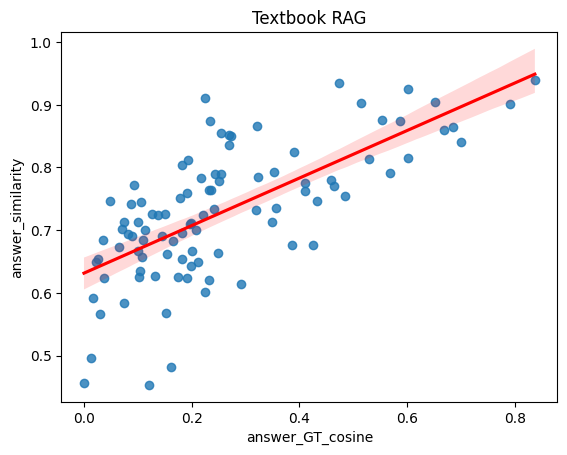

In [36]:
# correlation between tf-idf vectors and ragas semantic vectors
# textbook_df
print(pearsonr(x=textbook_df['answer_GT_cosine'], y=textbook_df['answer_similarity']))
print(spearmanr(a=textbook_df['answer_GT_cosine'], b=textbook_df['answer_similarity']))
sns.regplot(data=textbook_df, x='answer_GT_cosine', y='answer_similarity', line_kws={'color':'red'}).set(title='Textbook RAG')

PearsonRResult(statistic=0.48113954534391606, pvalue=6.972958790382235e-07)
SignificanceResult(statistic=0.6144736842105264, pvalue=2.7576862342429698e-11)


[Text(0.5, 1.0, 'Baseline RAG')]

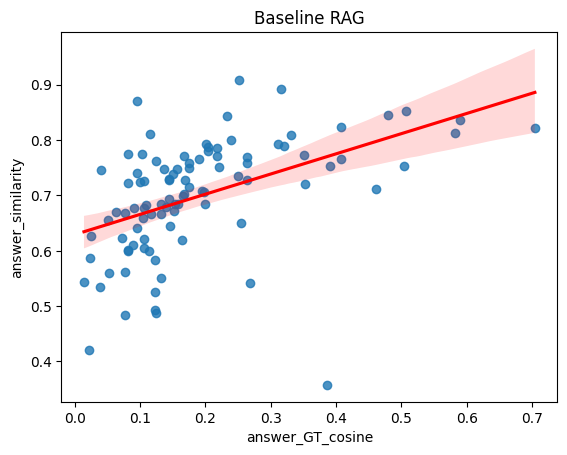

In [37]:
# correlation between tf-idf vectors and ragas semantic vectors
# baseline_df
print(pearsonr(x=baseline_df['answer_GT_cosine'], y=baseline_df['answer_similarity']))
print(spearmanr(a=baseline_df['answer_GT_cosine'], b=baseline_df['answer_similarity']))
sns.regplot(data=baseline_df, x='answer_GT_cosine', y='answer_similarity', line_kws={'color':'red'}).set(title='Baseline RAG')

### Matching Within the Continuation Questions

In [42]:
pd.set_option('display.max_colwidth', 1000)
cont_matching = textbook_df[['contexts', 'ground_truth', 'GT_context_ngram']][:60]
cont_matching.head()

,contexts,ground_truth,GT_context_ngram
0,"[In analogy to the current situation in Cosmology, glycans can be considered as the “dark matter” of the biological universe: a major and critical component that has yet to be fully incorporated into the “standard model” of biology. However, unlike the situation with dark matter in the Universe, there is already a lot known about glycans. The chemistry and metabolism of carbohydrates were prominent matters of interest in the first part of the 20th century., In addition, simple, rapidly turning over, protein-bound glycans are abundant within the nucleus and cytoplasm, in which they can serve as regulatory switches. A more complete paradigm of molecular biology must therefore include glycans, often in covalent combination with other macromolecules (i.e., glycoconjugates, such as glycoproteins and glycolipids)., Given all these major advances in basic and applied research on glycans, there is no reason why this major class of biomolecules should continue to be the “dark matter of the ...","However, unlike the situation with dark matter in the Universe, there is already a lot known about glycans. The chemistry and metabolism of carbohydrates were prominent matters of interest in the first part of the 20th century. Although engendering much attention, they were primarily considered as a source of energy or as structural materials, apparently lacking other biological activities. Furthermore, during the molecular biology revolution of the 1970s, studies of glycans lagged far behind those of other major classes of molecules. This was in part because of their inherent structural complexity, the difficulty in determining their sequences, and the fact that their biosynthesis could not be directly predicted from a DNA template.",0.400000
1,"[There are nine common monosaccharides found in vertebrate glycoconjugates (Figure 2.4). Once incorporated into a glycan, these nine monosaccharide building blocks can be further modified to generate additional sugar structures. For example, glucuronic acid (GlcA) can be epimerized at C-5 to generate IdoA., For example, D-mannose is the C-2 epimer of D-glucose, whereas D-galactose is the C-4 epimer of D-glucose (Figure 2.4). Monosaccharide names are frequently abbreviated; most common are three-letter abbreviations for simple monosaccharides (e.g., Gal, Glc, Man, Xyl, Fuc)., Thus, much of the possible diversity may yet exist in nature. Although several hundred distinct monosaccharides are known in nature, only a minority of these are commonly found in well-studied glycans. Examples of common monosaccharides in vertebrate cells are listed below, along with their standard abbreviations (for details regarding their structures, see Chapter 2, and embedded links from the symbols in Onli...","For example, glucuronic acid (GlcA) can be epimerized at C-5 to generate IdoA. Many more monosaccharides exist in glycoconjugates from other species and as intermediates in metabolism. We use a symbolic notation for the monosaccharides that are most abundant in vertebrate glycoconjugates (see Chapter 1). Common monosaccharides found in vertebrates. N-Acetylneuraminic acid is the most common form of sialic acid. Monosaccharides exist in solution as an equilibrium mixture of acyclic and cyclic forms. The percentage of each form depends on the sugar structure. The cyclic form of a monosaccharide is characterized by a hemiacetal group formed by the reaction of one of the hydroxyl groups with the C-1 aldehyde or ketone. For reasons of chemical stability, five- and six-membered rings are most commonly formed from acyclic monosaccharides. Hexoses (six-carbon aldoses) and hexuloses (six-carbon ketoses) form six-membered rings via a C-1—O—C-5 ring closure; they form five-membered rings thr...",0.384615
2,"[The conformational flexibility in IdoA residues likely allows orientation of the sulfate groups in HS to maximize the binding affinity to proteins. Structural elements that dictate pr

In [43]:
# GT matching
cont_matching.describe()

,GT_context_ngram
count,60.000000
mean,0.235230
std,0.279426
min,0.000000
25%,0.000000
50%,0.142857
75%,0.400000
max,1.000000
